In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv')
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [ ]:
df

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37244,jesus,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [ ]:
df["category"].value_counts()

,count
category,
1,15830
0,13142
-1,8277


In [ ]:
df.isnull().sum()

,0
clean_comment,100
category,0


In [ ]:
df[df["clean_comment"].isna()]["category"].value_counts()

,count
category,
0,100


In [ ]:
df.dropna(inplace=True).sum

In [ ]:
df.duplicated().sum()

np.int64(350)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df = df[~(df['clean_comment'].str.strip() == '')]

In [ ]:
df

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37244,jesus,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [ ]:
df.loc[37245]['clean_comment']

'kya bhai pure saal chutiya banaya modi aur jab saal khatam hone hai sala tune bhi chutiya bana diya'

In [ ]:
df['clean_comment'].str.lower().str.strip()

,clean_comment
0,family mormon have never tried explain them th...
1,buddhism has very much lot compatible with chr...
2,seriously don say thing first all they won get...
3,what you have learned yours and only yours wha...
4,for your own benefit you may want read living ...
...,...
37244,jesus
37245,kya bhai pure saal chutiya banaya modi aur jab...
37246,downvote karna tha par upvote hogaya
37247,haha nice


In [ ]:
df["clean_comment"]=df['clean_comment'].str.lower().str.strip()

/tmp/ipython-input-3315683376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["clean_comment"]=df['clean_comment'].str.lower().str.strip()


In [ ]:
df

,clean_comment,category
0,family mormon have never tried explain them th...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37244,jesus,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [ ]:
# Identify comments containing URLs
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comments_with_urls = df[df['clean_comment'].str.contains(url_pattern, regex=True)]

# Display the comments containing URLs
comments_with_urls.head()


,clean_comment,category


In [ ]:
df[df['clean_comment'].str.contains("\n")]

,clean_comment,category
448,what missing jpg\nand why this brilliant edit ...,1
781,india has been ruined congress and populist sc...,-1
847,like aap for its stand corruption and making p...,-1
871,reduced trade\ndeficit stronger rupee aren the...,0
1354,amsa press conference australian maritime safe...,1
...,...,...
35128,火箭o辛基 2016 sughosh bansal mission “make india”...,-1
35230,yikes the title should blind bhakts modi hater...,1
36187,hahahahahhahahah \niska klpd hogya,0
36517,्ा् ी ाी े ो ेी ाी े।\nे ी,0


In [ ]:
df['clean_comment']=df["clean_comment"].str.replace("\n", " ", regex=True)

/tmp/ipython-input-2326403630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_comment']=df["clean_comment"].str.replace("\n", " ", regex=True)


In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [ ]:
plt.style.use('seaborn-v0_8-darkgrid')

<Axes: xlabel='category', ylabel='count'>

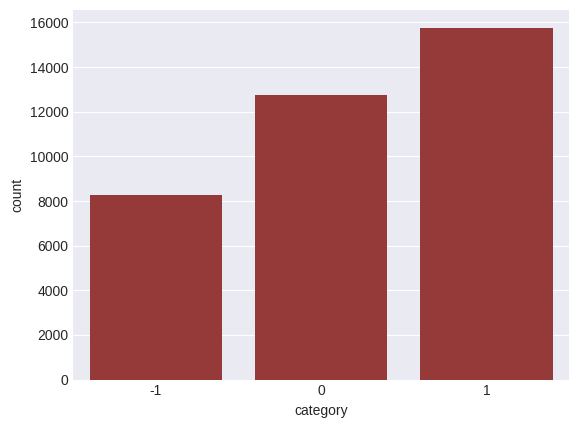

In [ ]:
sns.countplot(x="category", data=df, color="brown")

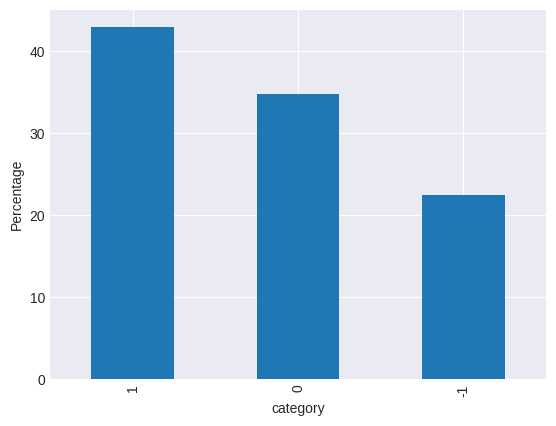

In [ ]:
df["category"].value_counts(normalize=True).mul(100).round(2).plot(kind="bar")
plt.ylabel("Percentage")
plt.show()

In [ ]:
df["word_count"]=df['clean_comment'].apply(lambda x: len(x.split()))

/tmp/ipython-input-2829734380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["word_count"]=df['clean_comment'].apply(lambda x: len(x.split()))


In [ ]:
df

,clean_comment,category,word_count
0,family mormon have never tried explain them th...,1,39
1,buddhism has very much lot compatible with chr...,1,196
2,seriously don say thing first all they won get...,-1,86
3,what you have learned yours and only yours wha...,0,29
4,for your own benefit you may want read living ...,1,112
...,...,...,...
37244,jesus,0,1
37245,kya bhai pure saal chutiya banaya modi aur jab...,1,19
37246,downvote karna tha par upvote hogaya,0,6
37247,haha nice,1,2


<Figure size 1500x400 with 0 Axes>

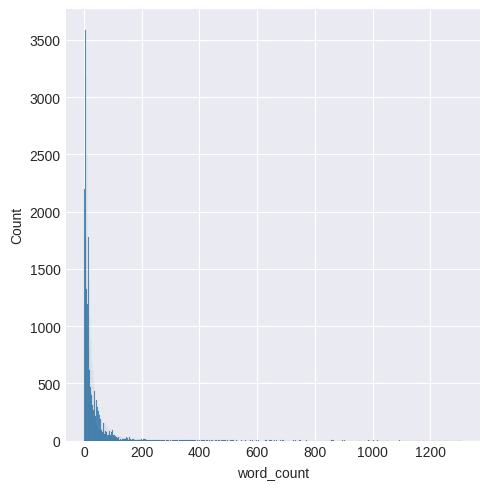

In [ ]:
plt.figure(figsize=(15,4))
sns.displot(x="word_count", data=df)

In [ ]:
# plt.figure(figsize=(10,6))

# sns.histplot(df[df["category"]==-1]["word_count"], kde=True, fill=True, label="Negative")
# sns.histplot(df[df["category"]==1]["word_count"], kde=True, fill=True, label="Positive")
# sns.histplot(df[df["category"]==0]["word_count"], kde=True, fill=True, label="Neutral")

# plt.legend()
# plt.show()

import plotly.figure_factory as ff
import numpy as np

neg = df[df["category"]==-1]["word_count"]
pos = df[df["category"]==1]["word_count"]
neu = df[df["category"]==0]["word_count"]

fig = ff.create_distplot(
    [neg, pos, neu],
    ["Negative", "Positive", "Neutral"],
    show_hist=True,
    show_rug=False,
    histnorm='probability',
)

fig.update_traces(opacity=0.4)   # overlap like seaborn

fig.update_layout(
    width=1000,
    height=500,
    title="Word Count Distribution by Sentiment",
)

fig.show()



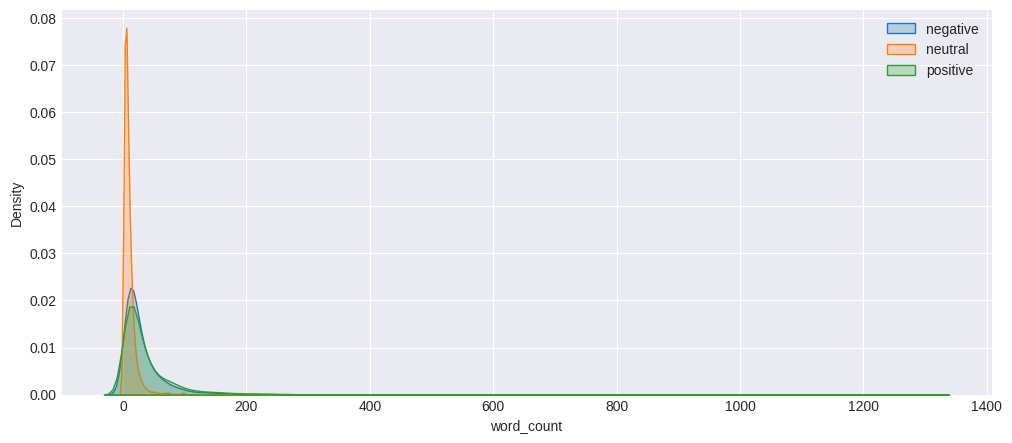

In [ ]:
plt.figure(figsize=(12,5))
sns.kdeplot(df[df["category"]==-1]["word_count"], fill=True, label="negative")
sns.kdeplot(df[df["category"]==0]["word_count"], fill=True, label="neutral")
sns.kdeplot(df[df["category"]==1]["word_count"], fill=True, label="positive")

plt.legend()
plt.show()

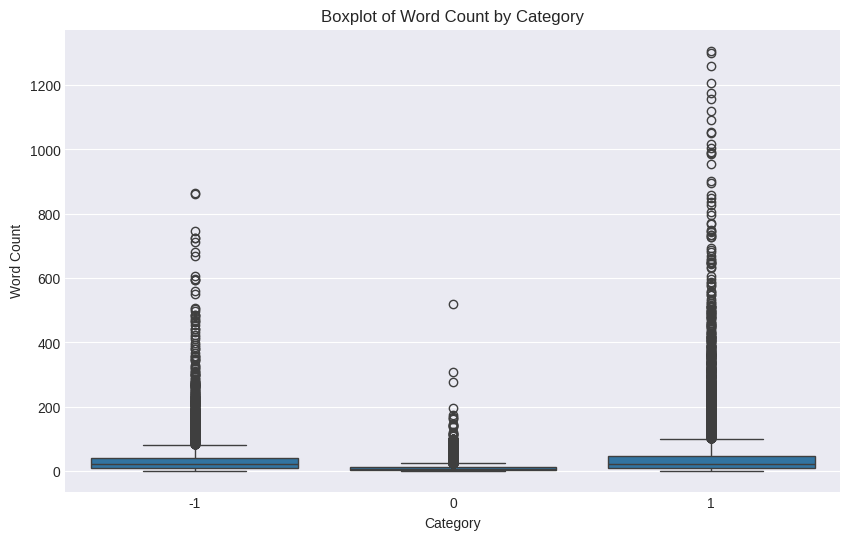

In [ ]:
# Create a boxplot for the 'wordcount' column categorized by 'category'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='category', y='word_count')
plt.title('Boxplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

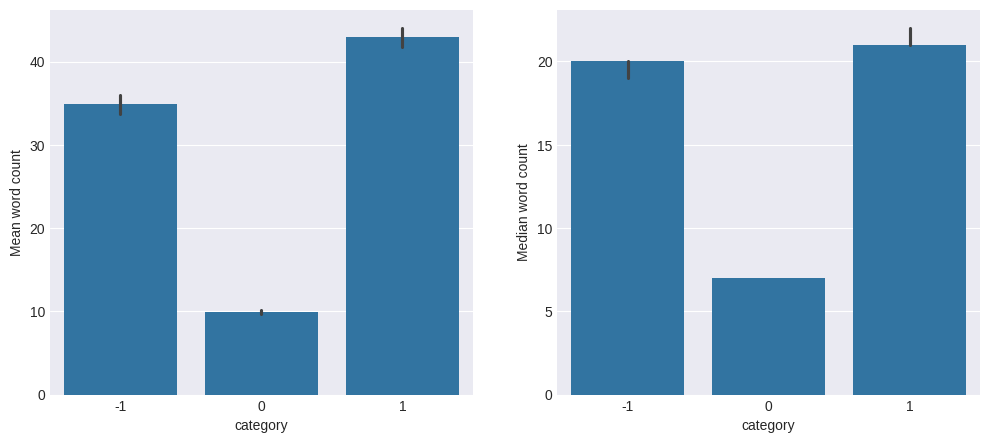

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.barplot(x="category", y="word_count", data=df)
plt.ylabel("Mean word count")

plt.subplot(1,2,2)
sns.barplot(x="category", y="word_count", data=df, estimator="median")
plt.ylabel("Median word count")

plt.show()

In [ ]:
from nltk.corpus import stopwords
import nltk

nltk.download("stopwords")

stopwords=set(stopwords.words("english"))
df["num_stopwords"]=df["clean_comment"].apply(lambda x: len([word for word in x.split() if word in stopwords]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df

,clean_comment,category,word_count,num_stopwords
0,family mormon have never tried explain them th...,1,39,13
1,buddhism has very much lot compatible with chr...,1,196,59
2,seriously don say thing first all they won get...,-1,86,40
3,what you have learned yours and only yours wha...,0,29,15
4,for your own benefit you may want read living ...,1,112,45
...,...,...,...,...
37244,jesus,0,1,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1,19,0
37246,downvote karna tha par upvote hogaya,0,6,0
37247,haha nice,1,2,0


<Axes: xlabel='category', ylabel='num_stopwords'>

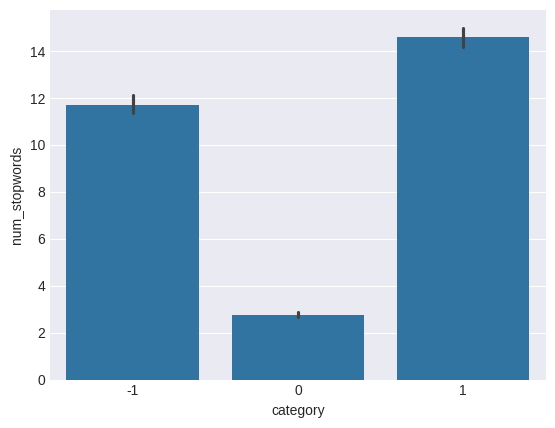

In [ ]:
sns.barplot(x="category", y="num_stopwords", data=df)

/tmp/ipython-input-282137760.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




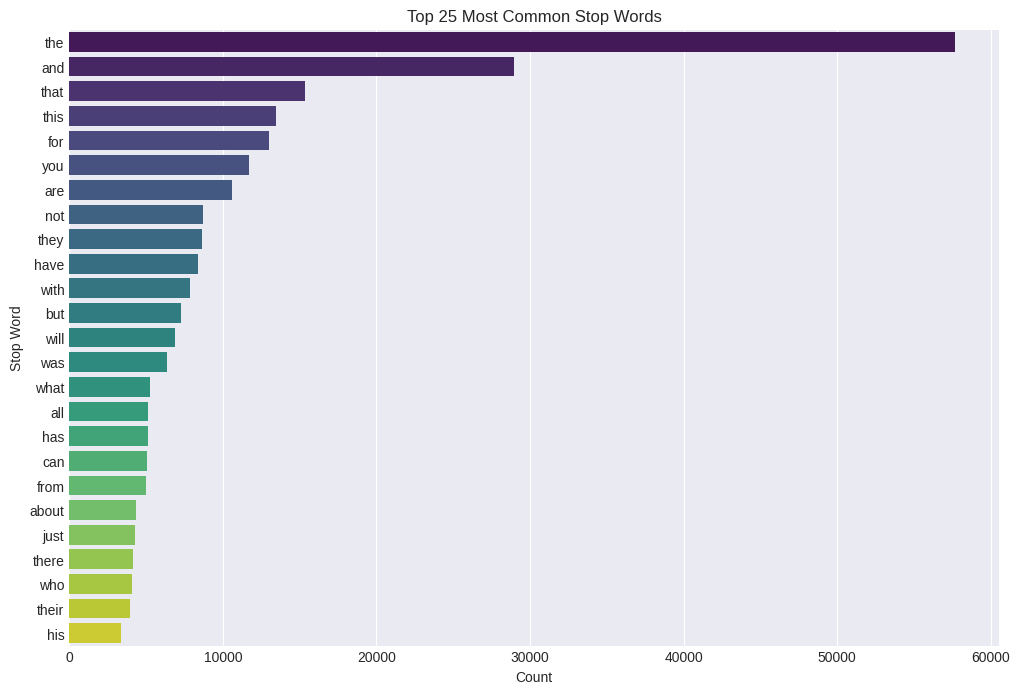

In [ ]:
# Create a frequency distribution of stop words in the 'clean_comment' column
from collections import Counter

# Extract all stop words from the comments using the previously defined 'common_stopwords'
all_stop_words = [word for comment in df['clean_comment'] for word in comment.split() if word in stopwords]

# Count the most common stop words
most_common_stop_words = Counter(all_stop_words).most_common(25)

# Convert the most common stop words to a DataFrame for plotting
top_25_df = pd.DataFrame(most_common_stop_words, columns=['stop_word', 'count'])

# Create the barplot for the top 25 most common stop words
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')
plt.title('Top 25 Most Common Stop Words')
plt.xlabel('Count')
plt.ylabel('Stop Word')
plt.show()

In [ ]:
df["num_chars"]=df["clean_comment"].apply(len)

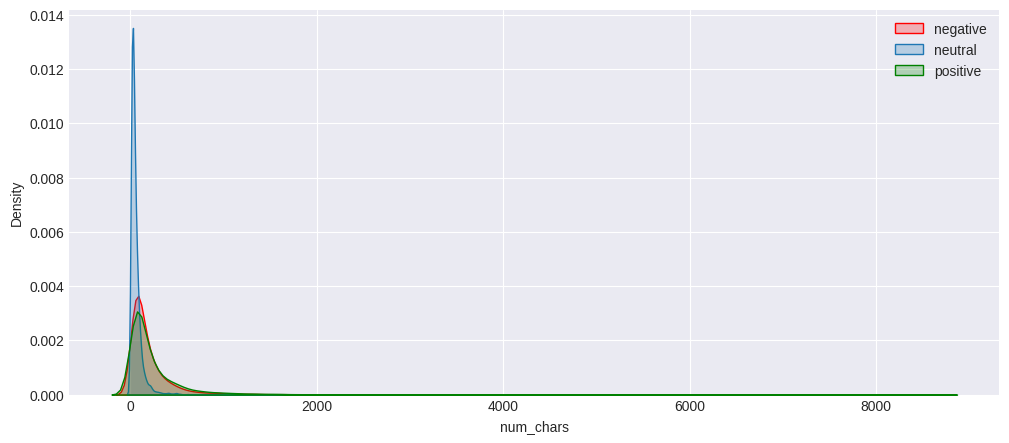

In [ ]:
plt.figure(figsize=(12,5))
sns.kdeplot(df[df["category"]==-1]["num_chars"], fill=True, label="negative", color="red")
sns.kdeplot(df[df["category"]==0]["num_chars"], fill=True, label="neutral")
sns.kdeplot(df[df["category"]==1]["num_chars"], fill=True, label="positive", color="green")

plt.legend()
plt.show()

In [ ]:
df

,clean_comment,category,word_count,num_stopwords,num_chars
0,family mormon have never tried explain them th...,1,39,13,259
1,buddhism has very much lot compatible with chr...,1,196,59,1268
2,seriously don say thing first all they won get...,-1,86,40,459
3,what you have learned yours and only yours wha...,0,29,15,167
4,for your own benefit you may want read living ...,1,112,45,690
...,...,...,...,...,...
37244,jesus,0,1,0,5
37245,kya bhai pure saal chutiya banaya modi aur jab...,1,19,0,99
37246,downvote karna tha par upvote hogaya,0,6,0,36
37247,haha nice,1,2,0,9


In [ ]:
from collections import Counter

# Combine all comments into one large string
all_text = ' '.join(df['clean_comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)



In [ ]:
set(char_frequency_df['character'].values)

{'征',
 'こ',
 'め',
 '\u200c',
 'п',
 'ṅ',
 '已',
 '题',
 '赏',
 '历',
 '悲',
 '相',
 '败',
 '定',
 '用',
 'ア',
 '乐',
 'च',
 '府',
 'ھ',
 '\xad',
 'ṣ',
 '钞',
 '文',
 't',
 'à',
 '香',
 '去',
 'ೂ',
 '呆',
 '词',
 '拿',
 '到',
 'ト',
 '团',
 '妻',
 '康',
 '笑',
 '¢',
 '河',
 'ゃ',
 '遥',
 '来',
 'ک',
 '间',
 '板',
 '忍',
 '妖',
 '觉',
 '激',
 'യ',
 'उ',
 '厂',
 '箭',
 '像',
 '同',
 '数',
 'و',
 '她',
 '芽',
 '形',
 'ण',
 'വ',
 '深',
 '湄',
 '贴',
 '司',
 '༎',
 '这',
 'ں',
 'ர',
 '≠',
 '翻',
 'ڑ',
 '。',
 'ų',
 '时',
 'ட',
 'ž',
 'み',
 '怎',
 '್',
 '疼',
 '某',
 '⏰',
 '就',
 '翠',
 '֣',
 '必',
 '種',
 '活',
 '存',
 'き',
 'ே',
 '贪',
 '\t',
 'っ',
 '韓',
 'ɣ',
 'g',
 '共',
 'ּ',
 '恒',
 'š',
 '彰',
 'h',
 '™',
 '光',
 '研',
 '涌',
 '丶',
 '可',
 '场',
 '无',
 '片',
 '蜂',
 'ह',
 '慵',
 '域',
 'れ',
 '码',
 '希',
 '֑',
 '灾',
 '没',
 '满',
 'ʎ',
 'ી',
 '左',
 '仅',
 '航',
 '折',
 '普',
 '⚰',
 '永',
 'خ',
 '未',
 '明',
 'ധ',
 'झ',
 'ً',
 '白',
 '百',
 '警',
 '暴',
 'ு',
 'آ',
 'ق',
 'ജ',
 '識',
 'で',
 '助',
 'റ',
 '圾',
 '理',
 '饼',
 '۔',
 '☆',
 '咒',
 '腾',
 '敏',
 'å',
 '✋',
 'せ',
 'ض',
 

In [ ]:
# Create a new column 'num_punctuation_chars' to count punctuation characters in each comment
df['num_punctuation_chars'] = df['clean_comment'].apply(
    lambda x: sum([1 for char in x if char in '.,!?;:"\'()[]{}-'])
)

In [ ]:
df

,clean_comment,category,word_count,num_stopwords,num_chars,num_punctuation_chars
0,family mormon have never tried explain them th...,1,39,13,259,0
1,buddhism has very much lot compatible with chr...,1,196,59,1268,0
2,seriously don say thing first all they won get...,-1,86,40,459,0
3,what you have learned yours and only yours wha...,0,29,15,167,0
4,for your own benefit you may want read living ...,1,112,45,690,0
...,...,...,...,...,...,...
37244,jesus,0,1,0,5,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1,19,0,99,0
37246,downvote karna tha par upvote hogaya,0,6,0,36,0
37247,haha nice,1,2,0,9,0


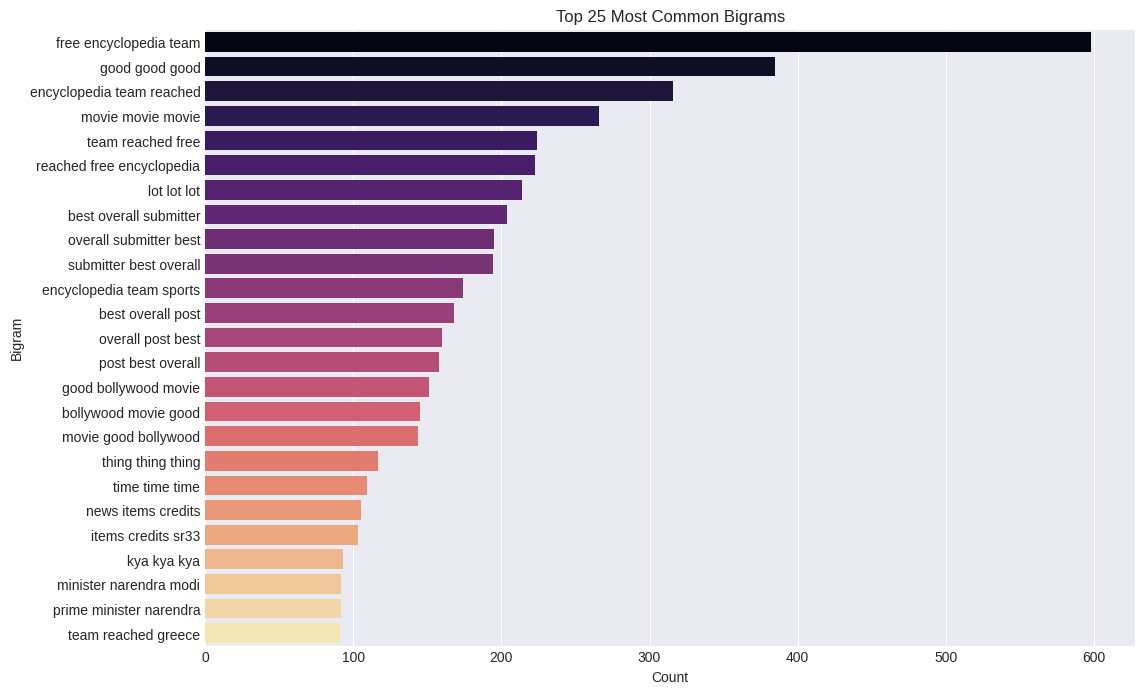

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a function to extract the top 25 bigrams
def get_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 bigrams
top_25_bigrams = get_top_ngrams(df['clean_comment'], 25)

# Convert the bigrams into a DataFrame for plotting
top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns=['bigram', 'count'])

# Plot the countplot for the top 25 bigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma', hue="bigram")
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()


In [ ]:
# Remove non-English characters from the 'clean_comment' column
# Keeping only standard English letters, digits, and common punctuation
import re

df['clean_comment'] = df['clean_comment'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s!?.,]', '', str(x)))

In [ ]:
all_text = ' '.join(df['clean_comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)

char_frequency_df

,character,frequency
6,,1091592
12,e,666610
13,t,491287
1,a,481134
3,i,401388
9,n,388465
7,o,379908
17,s,355279
8,r,331425
10,h,296748


In [ ]:
from nltk.corpus import stopwords

# Defining stop words but keeping essential ones for sentiment analysis
stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}

# Remove stop words from 'clean_comment' column, retaining essential ones
df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)

In [ ]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

# Define the lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the 'clean_comment_no_stopwords' column
df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)

df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,clean_comment,category,word_count,num_stopwords,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


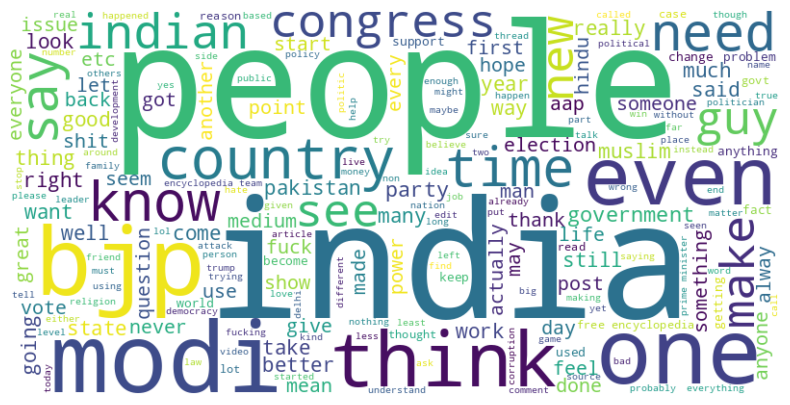

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df['clean_comment'])

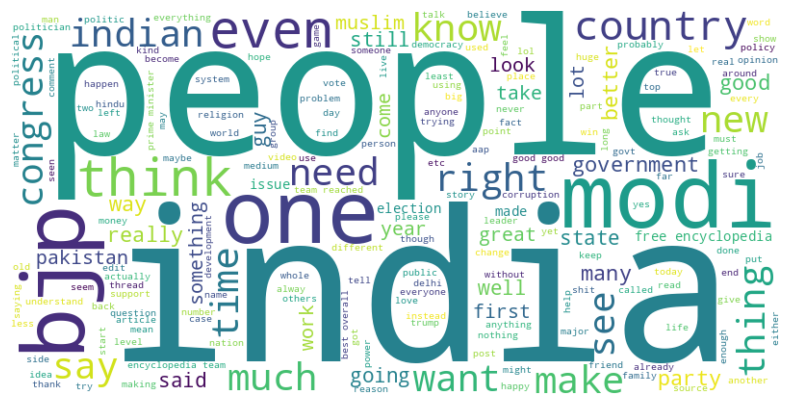

In [ ]:
def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['category'] == 1]['clean_comment'])

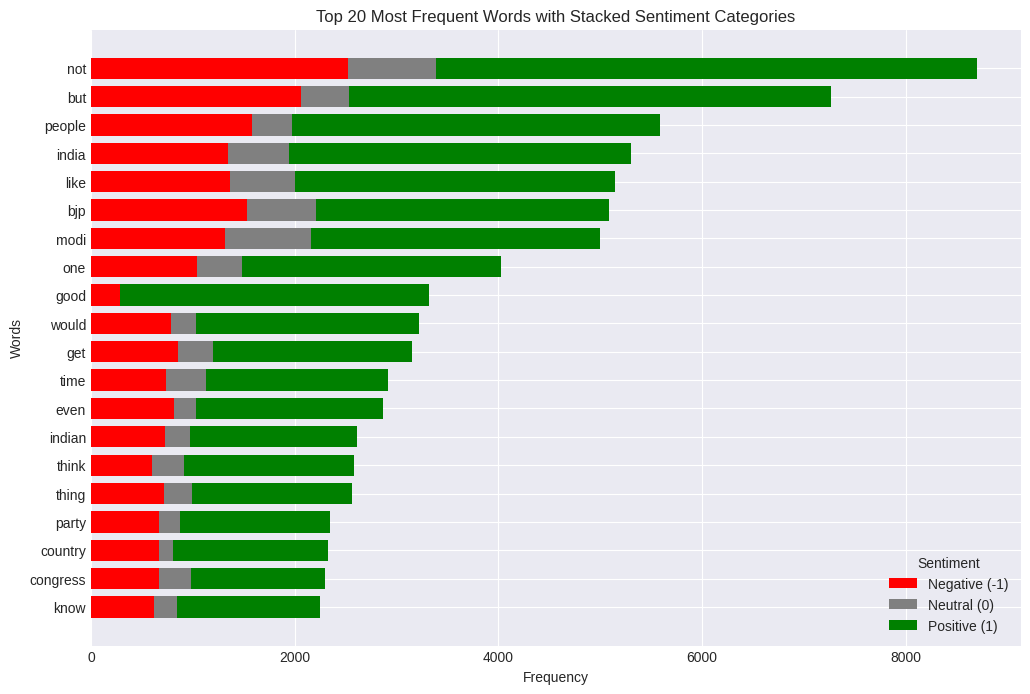

In [ ]:
def plot_top_n_words_by_category(df, n=20, start=0):
    """Plot the top N most frequent words in the dataset with stacked hue based on sentiment category."""
    # Flatten all words in the content column and count their occurrences by category
    word_category_counts = {}

    for idx, row in df.iterrows():
        words = row['clean_comment'].split()
        category = row['category']  # Assuming 'category' column exists for -1, 0, 1 labels

        for word in words:
            if word not in word_category_counts:
                word_category_counts[word] = { -1: 0, 0: 0, 1: 0 }  # Initialize counts for each sentiment category

            # Increment the count for the corresponding sentiment category
            word_category_counts[word][category] += 1

    # Get total counts across all categories for each word
    total_word_counts = {word: sum(counts.values()) for word, counts in word_category_counts.items()}

    # Get the top N most frequent words across all categories
    most_common_words = sorted(total_word_counts.items(), key=lambda x: x[1], reverse=True)[start:start+n]
    top_words = [word for word, _ in most_common_words]

    # Prepare data for plotting
    word_labels = top_words
    negative_counts = [word_category_counts[word][-1] for word in top_words]
    neutral_counts = [word_category_counts[word][0] for word in top_words]
    positive_counts = [word_category_counts[word][1] for word in top_words]

    # Plot the stacked bar chart
    plt.figure(figsize=(12, 8))
    bar_width = 0.75

    # Plot negative, neutral, and positive counts in a stacked manner
    plt.barh(word_labels, negative_counts, color='red', label='Negative (-1)', height=bar_width)
    plt.barh(word_labels, neutral_counts, left=negative_counts, color='gray', label='Neutral (0)', height=bar_width)
    plt.barh(word_labels, positive_counts, left=[i+j for i,j in zip(negative_counts, neutral_counts)], color='green', label='Positive (1)', height=bar_width)

    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {n} Most Frequent Words with Stacked Sentiment Categories')
    plt.legend(title='Sentiment', loc='lower right')
    plt.gca().invert_yaxis()  # Invert y-axis to show the highest frequency at the top
    plt.show()

plot_top_n_words_by_category(df, n=20)
